In [10]:
import numpy as np
import matplotlib.pyplot as plt

filepath = 'e_decay.txt'

sigLen = 2000 #This is the max length of a signal on the JDS6600
outArr = np.zeros(sigLen) #
bits = 8 #number of bits to output numbers as

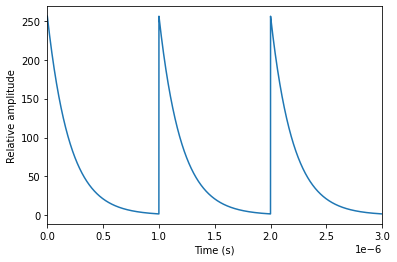

In [11]:
## PUT YOUR WAVE OPTIONS HERE

wave1 = lambda t : 0*np.sin(2*np.pi*t/sigLen) # make sure the sin wave is scaled properly
wave2 = lambda t: np.exp(-5*t/sigLen)*1
wave3 = lambda t: t*0
wave4 = lambda t: t*0


#combine all waves
for i in range(sigLen):
    
    outArr[i] = wave1(i)+wave2(i)+wave3(i)+wave4(i)

# Normalize to nearly full bit range (i.e. bit=8, max->256, min->0)
outArr = outArr/max(abs(outArr))*(2**bits)



# Show the waveform (in length)
freq = 1000000 #frequency of generator in Hz
timeStep = 1/(freq*sigLen) #time step per point
numWave = 3 # Set the number of waveforms to display

#plot the result for visual inspection (note the .tolist() is a hacky way to append outArr to itself numWave times)
plt.plot(np.linspace(0,timeStep*numWave*sigLen, numWave*sigLen), outArr.tolist()*numWave)
plt.xlabel('Time (s)')
plt.ylabel('Relative amplitude')
plt.xlim([0,timeStep*numWave*sigLen])

plt.show()

In [12]:
with open(filepath, 'w') as f:
    for item in outArr.tolist()*numWave:
        f.write("%d\n" % int(item))